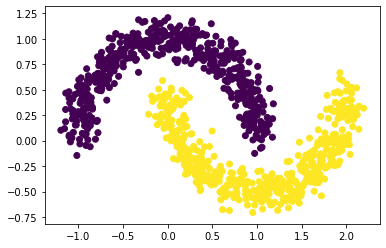

In [89]:
from sklearn.datasets import make_blobs, make_moons
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

X, y = make_moons(n_samples=1000, random_state = 18, noise=0.1)
plt.scatter(X[:,0], X[:,1], c = y)



In [90]:
y = y.reshape(-1,1)


In [97]:
def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-(x))

    return 1/(1+np.exp(-x))
    
#X = np.array([[0,0,1],[0,1,1],[1,0,1],[1,1,1]])
                
#y = np.array([[0],[1],[1],[0]])

np.random.seed(1)

# случайно инициализируем веса, в среднем - 0
syn0 = 2*np.random.random((X.shape[1],4)) - 1 #задаем веса и размер слоёв случайно 
syn1 = 2*np.random.random((4,3)) - 1 
syn2 = 2*np.random.random((3,1)) - 1

lr = 0.1
for j in range(10000):
# проходим вперёд по слоям 0, 1 и 2
    l0 = X
    l1 = nonlin(np.dot(l0,syn0))
    l2 = nonlin(np.dot(l1,syn1))
    l3 = nonlin(np.dot(l2,syn2))
# как сильно мы ошиблись относительно нужной величины?
    
    
    if (j% 10000) == 0:
        print ("Error:" + str(np.mean(np.abs(l3_error))))
        
    # в какую сторону нужно двигаться?
    # если мы были уверены в предсказании, то сильно менять его не надо
    l3_error = y - l3
    l3_delta = l3_error*nonlin(l3,deriv=True)
    l2_error = l3_delta.dot(syn2.T)
    l2_delta = l2_error*nonlin(l2,deriv=True)
    l1_error = l2_delta.dot(syn1.T)
    l1_delta = l1_error * nonlin(l1,deriv=True)
   
    syn0 += lr*l0.T.dot(l1_delta) 
    syn1 += lr*l1.T.dot(l2_delta) 
    syn2 += lr*l2.T.dot(l3_delta)

Error:0.025336789762372337


In [92]:
 y.shape

(1000, 1)

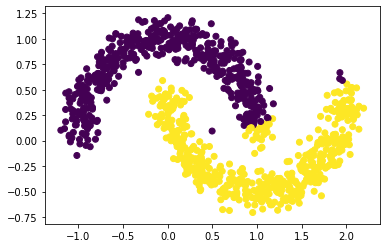

In [98]:
plt.scatter(X[:,0], X[:,1], c = np.round(l3.T.squeeze()))

In [99]:
from sklearn.metrics import accuracy_score

In [100]:
accuracy_score(y,np.round(l3.T.squeeze()))

0.972